# TABLE OF CONTENTS:

### - PART 1: CHECK IMBALANCE
### - PART 2: CHECK outlier
### - PART 3: CHECK MISSING VALUES
### - PART 4: CHECK CATEGORICAL COLUMNS 
### - PART 5: EDA
### - PART 6: OBSERVATION AND CONCLUSION

In [1]:
from utils import *
from input import path_to_data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#for 100% jupyter notebook cell width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pandas DataFrame column and row display limits
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

%matplotlib inline

**dseb63_application_{train|test}.csv**

In [3]:
application_train = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_train.csv'), index_col=0)

In [4]:
application_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,

In [5]:
print('-'*90)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*90)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*90)

------------------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 122)
------------------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
------------------------------------------------------------------------------------------


In [6]:
application_test = pd.read_csv(os.path.join(path_to_data, 'dseb63_application_test.csv'), index_col=0)

In [7]:
application_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,0.4167,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / seco

In [8]:
print('-'*100)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*100)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*100)

----------------------------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 121)
----------------------------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
----------------------------------------------------------------------------------------------------


# *0. LOOKTHROUGH DATA*

**dseb63_POS_CASH_balance.csv**
#### Description

This table contains the Monthly Balance Snapshots of previous Point of Sales and Cash Loans that the applicant had with Home Credit Group. The table contains columns like the status of contract, the number of installments left, etc.

In [9]:
POS_CASH_balance = pd.read_csv(os.path.join(path_to_data, 'dseb63_POS_CASH_balance.csv'))
POS_CASH_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [10]:
POS_CASH_balance.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [11]:
POS_CASH_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,8543375.0,1.903489e+06,535938.725528,1000001.0,1434475.0,1896878.0,2369096.0,2843499.0
MONTHS_BALANCE,8543375.0,-3.494812e+01,26.053718,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,8521512.0,1.703348e+01,12.004305,1.0,10.0,12.0,24.0,84.0
CNT_INSTALMENT_FUTURE,8521497.0,1.046808e+01,11.144076,0.0,3.0,7.0,14.0,84.0
SK_DPD,8543375.0,1.190473e+01,134.030213,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,8543375.0,5.835209e-01,30.421100,0.0,0.0,0.0,0.0,3373.0
SK_ID_CURR,8543375.0,1.535356e+05,88716.609408,0.0,76622.0,153315.0,230293.0,307510.0


In [12]:
column_to_move = 'SK_ID_CURR'  

# Get a list of column names excluding the column to move
other_columns = [col for col in POS_CASH_balance .columns if col != column_to_move]

# Reorder the columns with the column to move in the second position
POS_CASH_balance = POS_CASH_balance[other_columns[:1] + [column_to_move] + other_columns[1:]]
# Display the updated DataFrame
POS_CASH_balance .head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,185279,-31,48.0,45.0,Active,0,0
1,1803195,185279,-17,48.0,31.0,Active,0,0
2,1803195,185279,-21,48.0,35.0,Active,0,0
3,1803195,185279,-8,48.0,21.0,Active,0,0
4,1803195,185279,-4,48.0,17.0,Active,0,0


In [13]:
print(f'The shape of POS_CASH_balance.csv is: {POS_CASH_balance.shape}')
print('-'*100)
print(f'Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: {len(POS_CASH_balance.SK_ID_PREV.unique())}')
print(f'Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: {len(POS_CASH_balance.SK_ID_CURR.unique())}')
print('-'*100)
print(f'Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: {len(set(application_train.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: {len(set(application_test.SK_ID_CURR.unique()).intersection(set(POS_CASH_balance.SK_ID_CURR.unique())))}')
print('-'*100)
print(f'Number of duplicate values in POS_CASH_balance: {POS_CASH_balance.shape[0] - POS_CASH_balance.duplicated().shape[0]}')

The shape of POS_CASH_balance.csv is: (8543375, 8)
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in dseb63_POS_CASH_balance.csv are: 800337
Number of unique SK_ID_CURR in dseb63_POS_CASH_balance.csv are: 289444
----------------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in dseb63_application_train.csv and POS_CASH_balance.csv are: 231531
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and POS_CASH_balance.csv are: 57913
----------------------------------------------------------------------------------------------------
Number of duplicate values in POS_CASH_balance: 0


# *1.IMBALANCE*

In [14]:
imbalance_col(POS_CASH_balance)

Imbalance Ratio for column 'MONTHS_BALANCE': None
Imbalance Ratio for column 'CNT_INSTALMENT': None
Imbalance Ratio for column 'CNT_INSTALMENT_FUTURE': 0.4315
Imbalance Ratio for column 'NAME_CONTRACT_STATUS': 0.0000
Imbalance Ratio for column 'SK_DPD': 0.0023
Imbalance Ratio for column 'SK_DPD_DEF': 0.0023
------------------------------------------------------------------------------------------
The column with the heaviest imbalance ratio is 'CNT_INSTALMENT_FUTURE' with ratio 0.4315


##### Observations and Conclusions

MONTHS_BALANCE: No imbalance detected.

CNT_INSTALMENT: No imbalance detected.

CNT_INSTALMENT_FUTURE: Moderate imbalance ratio (0.4315), indicating a somewhat uneven distribution.

NAME_CONTRACT_STATUS: No imbalance detected.

SK_DPD: Low imbalance ratio (0.0023), minimal class imbalance.

SK_DPD_DEF: Low imbalance ratio (0.0023), minimal class imbalance

It's essential to address imbalances where the ratio is relatively high.

# *2.Outlier*

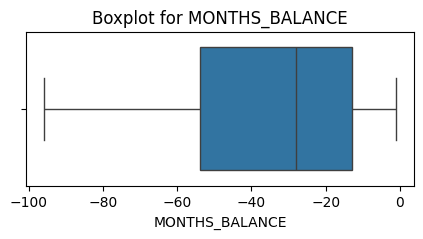

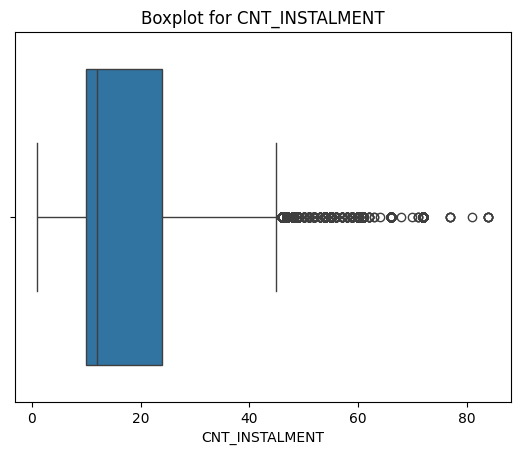

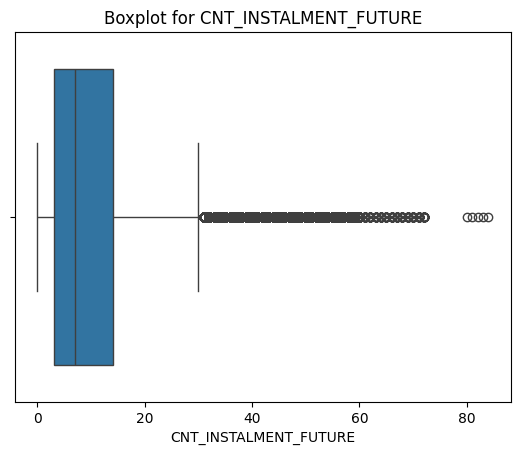

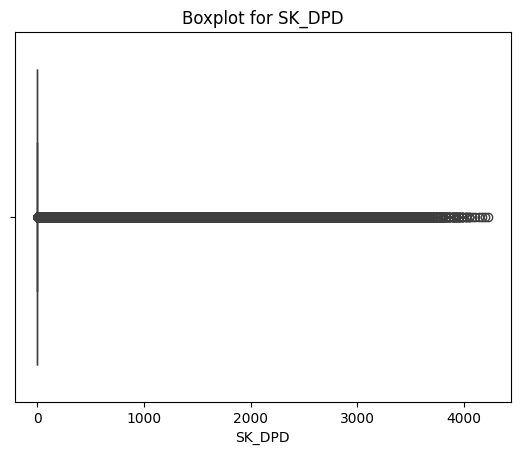

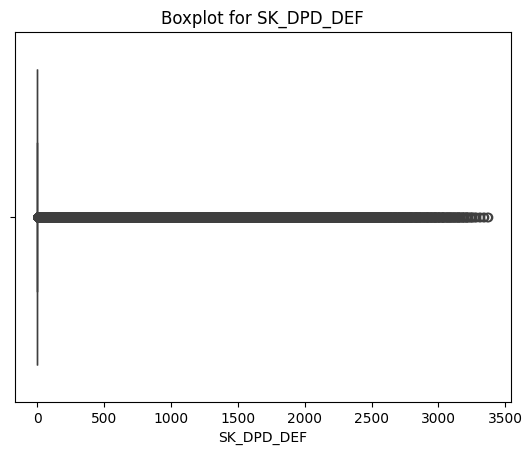

Rows with outliers:
         MONTHS_BALANCE  CNT_INSTALMENT  CNT_INSTALMENT_FUTURE  SK_DPD  \
0                   -31            48.0                   45.0       0   
1                   -17            48.0                   31.0       0   
2                   -21            48.0                   35.0       0   
3                    -8            48.0                   21.0       0   
4                    -4            48.0                   17.0       0   
...                 ...             ...                    ...     ...   
8542912             -94             8.0                    0.0     384   
8542914             -95             8.0                    0.0     354   
8542915             -96             8.0                    0.0     323   
8542916             -90             8.0                    0.0     505   
8542951              -3            12.0                    4.0       3   

         SK_DPD_DEF  
0                 0  
1                 0  
2                 0  
3  

In [15]:
outlier(POS_CASH_balance)

##### Observations and Conclusions
MONTHS_BALANCE: No specific information on outliers. You may need to further analyze the distribution of values in this column to identify potential outliers.

CNT_INSTALMENT: No specific information on outliers. Further analysis is needed to identify and handle outliers.

CNT_INSTALMENT_FUTURE: No specific information on outliers. Additional analysis is required to identify and address any outliers in this column.

NAME_CONTRACT_STATUS: No information on outliers. This column likely contains categorical data, so outliers may not be applicable.

SK_DPD: Outliers may be present, as the values seem to be numeric and can have higher values, e.g., 384, 354, 505. Further analysis is needed to confirm and handle outliers.

SK_DPD_DEF: Similar to SK_DPD, outliers may be present. Further analysis is required.

# *3. NaN Percentage*

In [16]:
nan_pos = nan_percent(POS_CASH_balance)
nan_pos

,Column,Percentage_of_NaN
4,CNT_INSTALMENT_FUTURE,0.256081
3,CNT_INSTALMENT,0.255906
1,SK_ID_CURR,0.000000
0,SK_ID_PREV,0.000000
2,MONTHS_BALANCE,0.000000
5,NAME_CONTRACT_STATUS,0.000000
6,SK_DPD,0.000000
7,SK_DPD_DEF,0.000000


Number of columns having NaN values: 2 columns


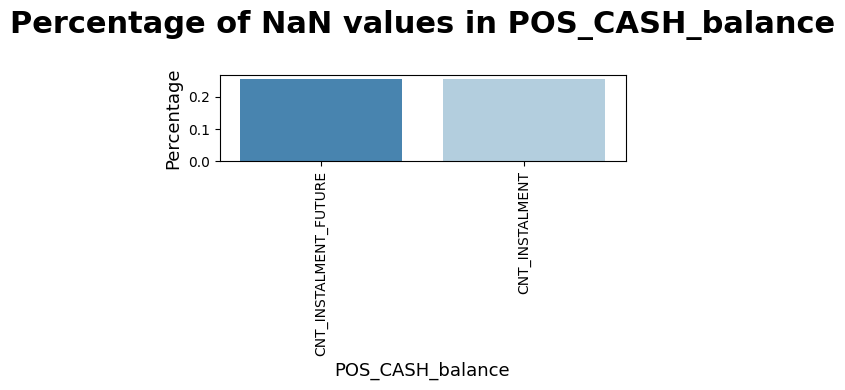

In [17]:
plot_nan_percent(nan_pos, 'POS_CASH_balance', tight_layout = False, figsize = (5,4))

##### Observations and Conclusions

<ol><li>There are only 2 columns which contain NaN values of the 8 columns from POS_CASH_balance. These columns are the Counts of Installments remaining and the term of the loan.</li>
    <li>These columns also contain very minimal proportion of NaN values, i.e only 0.256%%, so it is also not of much concern.</li></ol>

# *4.  CATEGORICAL COLUMN*

In [18]:
cate_pc = get_category_column(POS_CASH_balance)
cate_pc

,Feature,Nunique,Percentage of NaN
0,NAME_CONTRACT_STATUS,9,0.0


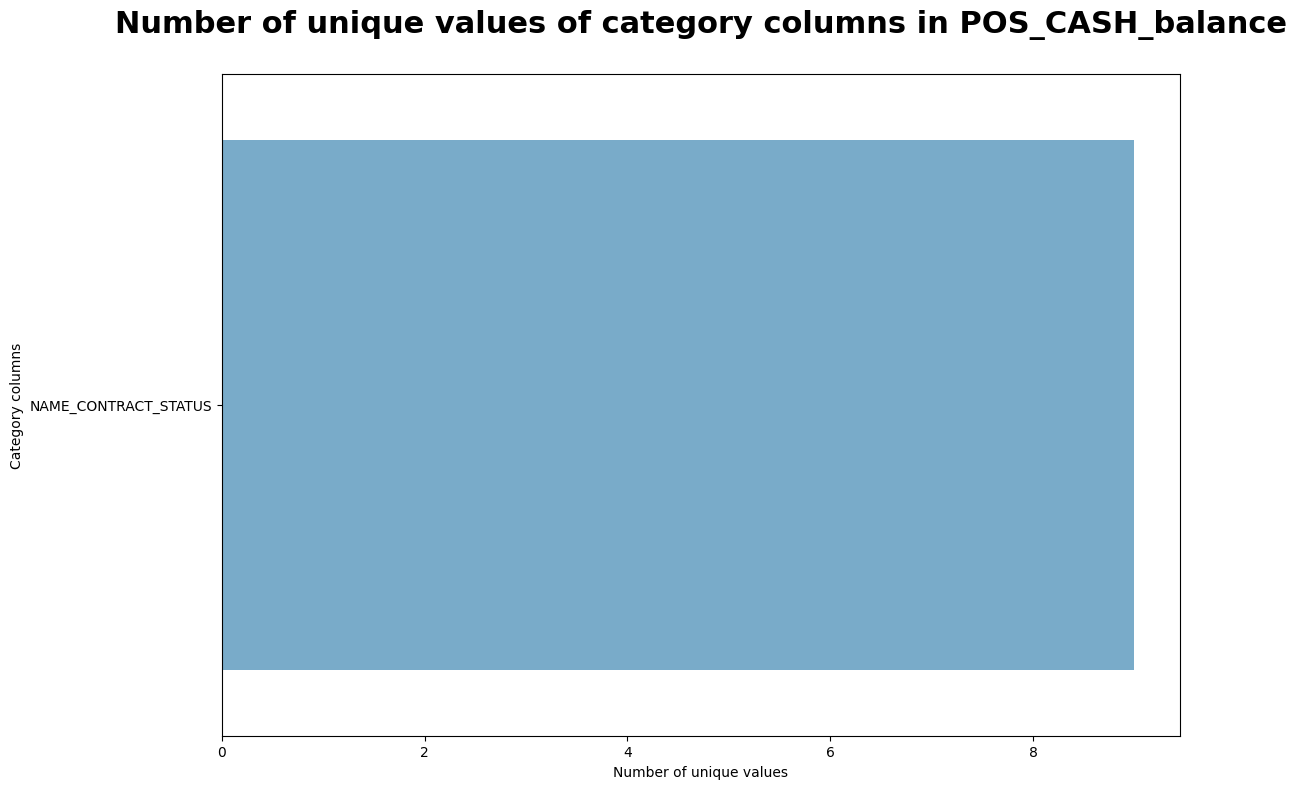

In [19]:
plot_category_column(cate_pc, 'POS_CASH_balance')

##### Observations and Conclusions

Feature: NAME_CONTRACT_STATUS

Number of Unique Values (Nunique): 9

Percentage of Missing Values (NaN): 0.0%

This feature has nine unique values, and there are no missing values (NaN) in this column, as indicated by the 0.0% percentage of NaN.

Having no missing values is generally good as it simplifies the data preprocessing steps. The presence of nine unique values suggests that 'NAME_CONTRACT_STATUS' is likely a categorical variable with different contract status categories.

# *5.EDA*

### 5.1.CORRELATION

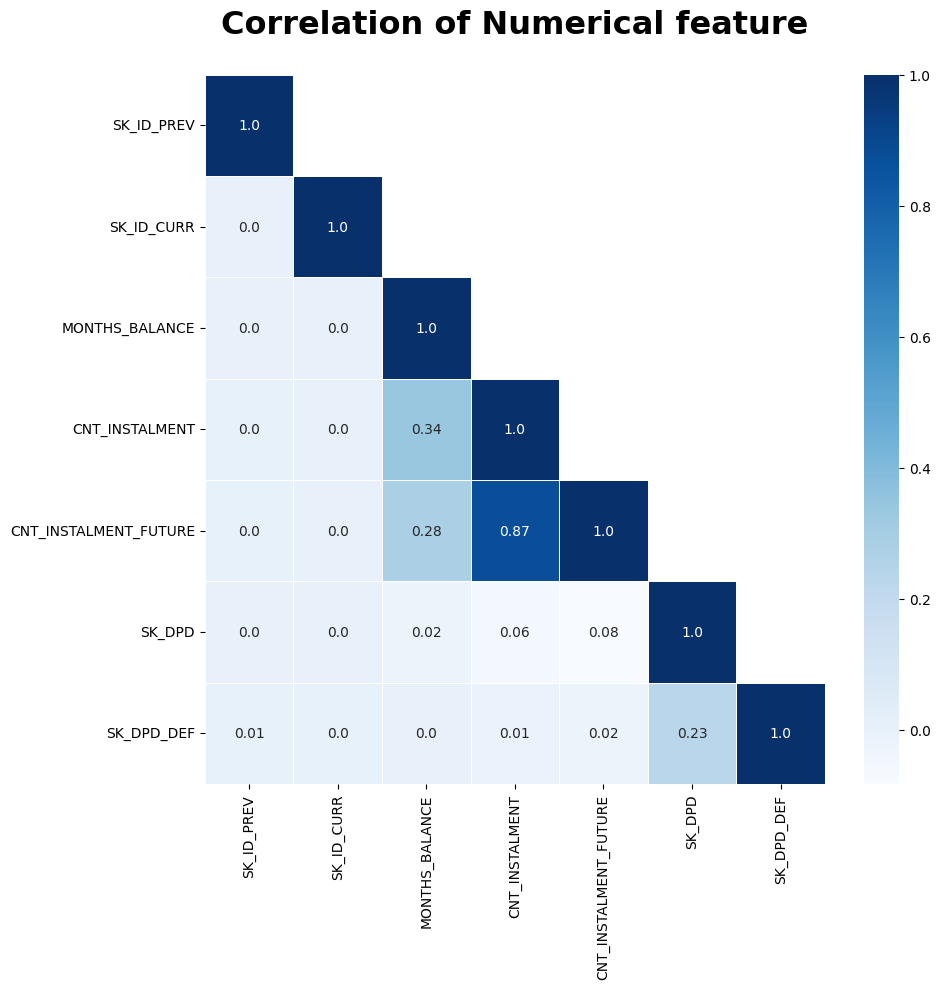

In [20]:
numeric_cor(POS_CASH_balance)

### 5.2.Merging the TARGETS from application_train to POS_CASH_balance table

In [21]:
print("-"*90)
print("Merging TARGET with POS_CASH_balance Table")
pos_cash_merged = application_train[['TARGET','SK_ID_CURR']].merge(POS_CASH_balance, on = 'SK_ID_CURR', how = 'left')
print("-"*90)

------------------------------------------------------------------------------------------
Merging TARGET with POS_CASH_balance Table
------------------------------------------------------------------------------------------


### 5.3.Correlation Matrix of Features

------------------------------------------------------------------------------------------


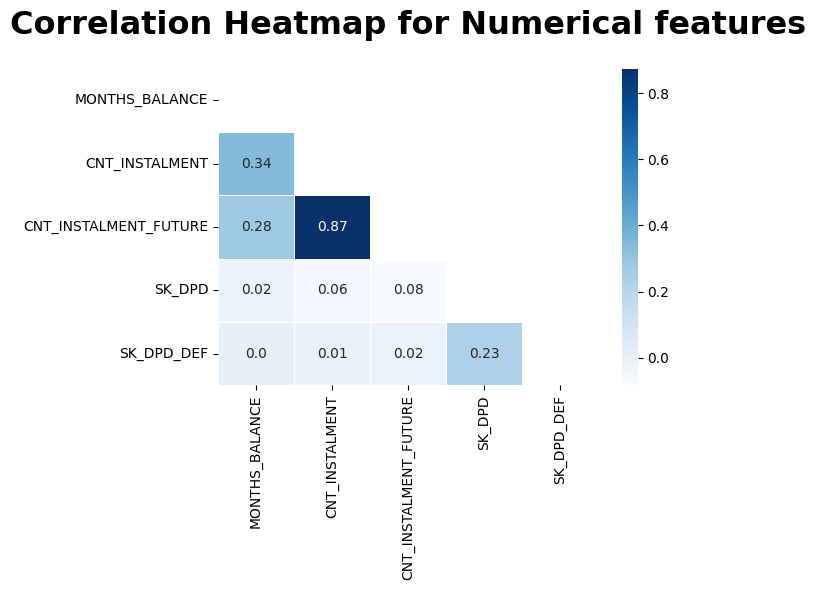

------------------------------------------------------------------------------------------


In [22]:
corr_ma = correlation_matrix(pos_cash_merged, ['SK_ID_CURR','SK_ID_PREV'], figsize = (7,6))
corr_ma.plot_correlation_matrix()

In [23]:
top_corr_target_df = corr_ma.target_top_corr()
print("-"*90)
print("Columns with highest values of Phik-correlation with Target Variable are:")
display(top_corr_target_df)
print("-"*90)

interval columns not set, guessing: ['TARGET', 'MONTHS_BALANCE']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT']
interval columns not set, guessing: ['TARGET', 'CNT_INSTALMENT_FUTURE']
interval columns not set, guessing: ['TARGET', 'SK_DPD']
interval columns not set, guessing: ['TARGET', 'SK_DPD_DEF']
------------------------------------------------------------------------------------------
Columns with highest values of Phik-correlation with Target Variable are:


,Column Name,Phik-Correlation
2,CNT_INSTALMENT_FUTURE,0.032245
1,CNT_INSTALMENT,0.029821
0,MONTHS_BALANCE,0.026547
3,SK_DPD,0.008896
4,SK_DPD_DEF,0.007073


------------------------------------------------------------------------------------------


##### Observations and Conclusions:

<ol>
    <li>The above heatmap shows the correlation between the fetures</li>
    <li>From the heatmap of correlation matrix, we one set of moderately correlated features, which are: CNT_INSTALMENT and CNT_INSTALMENT_FUTURE.</li>
    <li>The correlation of features with Target is very low, this shows the absence of a linear relationship between the feature and the target variable.</li></ol>

### 5.4.Plotting Continuous Variables

Firstly we will group by the 'SK_ID_PREV' field and aggregate with mean, so that we get an averaged row for each of the previous loan that the client had.

In [24]:
pos_cash_merged = pos_cash_merged.groupby('SK_ID_PREV').agg('mean', numeric_only = True)
pos_cash_merged.head()

,TARGET,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1000001.0,0.0,117953.0,-9.0,8.666667,7.666667,0.0,0.0
1000003.0,0.0,6707.0,-2.5,12.000000,10.500000,0.0,0.0
1000005.0,0.0,83759.0,-51.0,10.000000,5.000000,0.0,0.0
1000008.0,0.0,185554.0,-38.5,9.900000,5.400000,0.0,0.0
1000011.0,0.0,268838.0,-9.0,12.000000,6.000000,0.0,0.0


<b><u> + Distribution of Continuous Vairable CNT_INSTALMENT_FUTURE</u></b>

This column describes the number of installments left to pay on the previous credit.

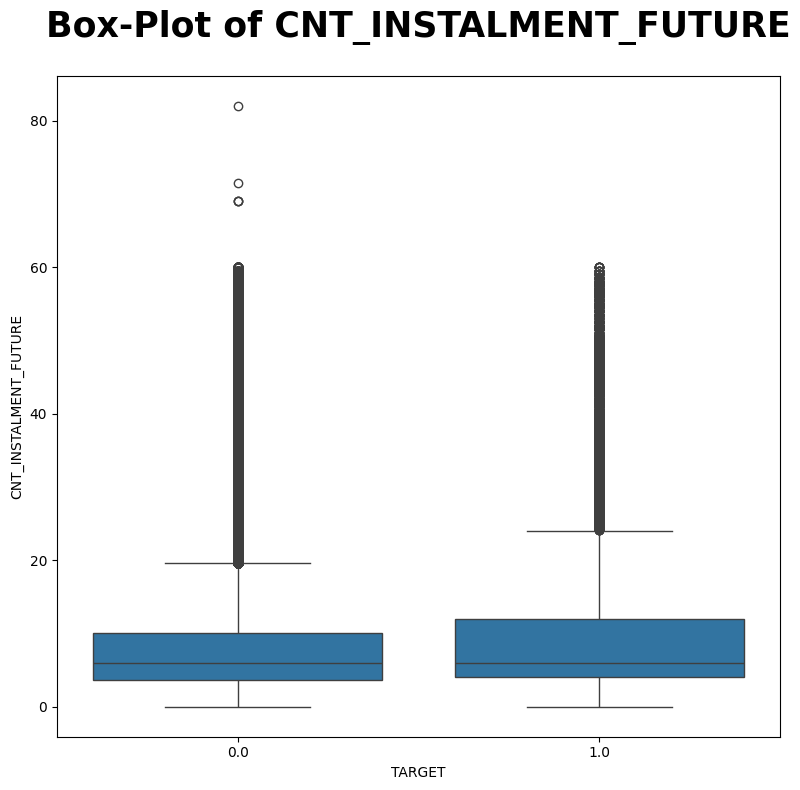

In [25]:
plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', plots = ['box'], figsize = (8,8))
del pos_cash_merged

##### Observations and Conclusions

Looking at the above box-plot for CNT_INSTALMENT_FUTURE, we see that the percentile values>50% for Defaulters are usually higher than those of Non-Defaulters. Even the upper limit whisker for Defaulters is higher than that of Non-Defaulters. This suggests that the Defaulters tend to have more number of Installments remaining on their previous credits as compared to Non-Defaulters.

### 5.5.Distribution

#### - Distribution of MONTH_BALANCE

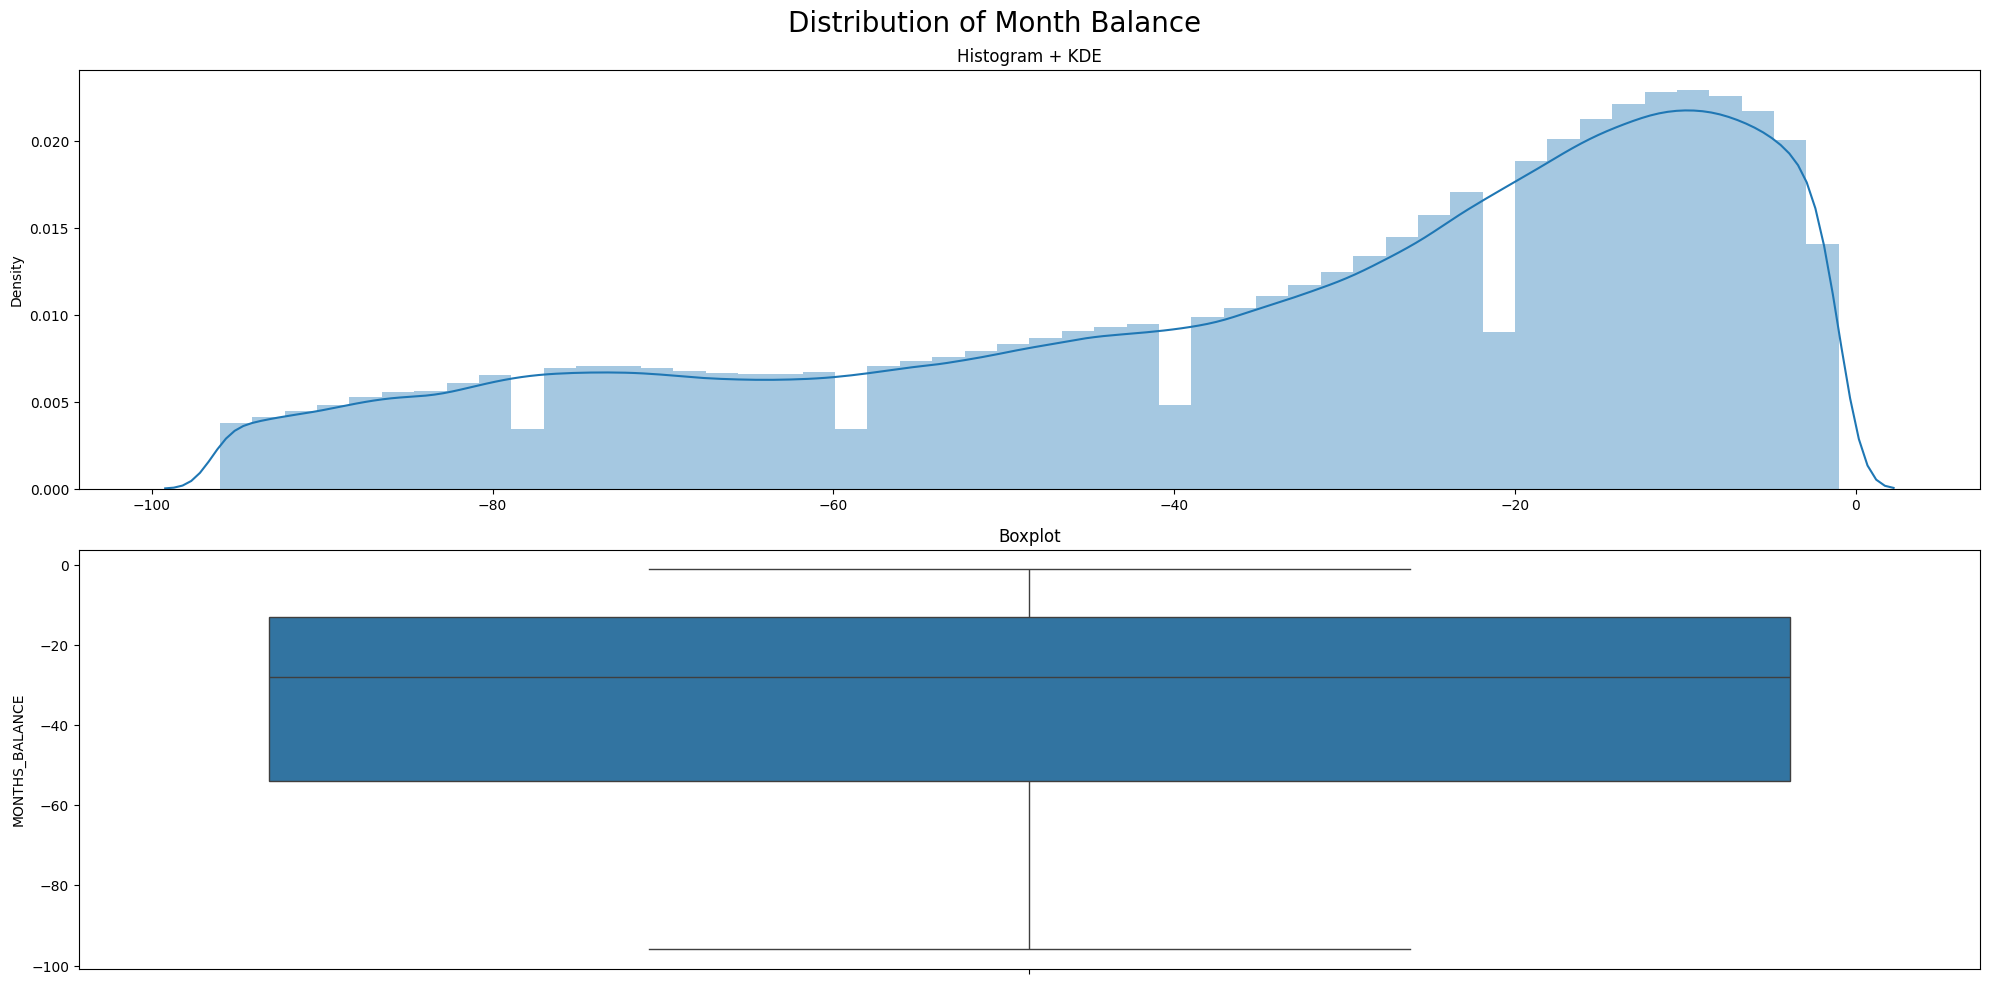

In [26]:
draw_distribution(POS_CASH_balance['MONTHS_BALANCE'],'Distribution of Month Balance')

#### - Distribution of CNT_INSTALMENT_FUTURE

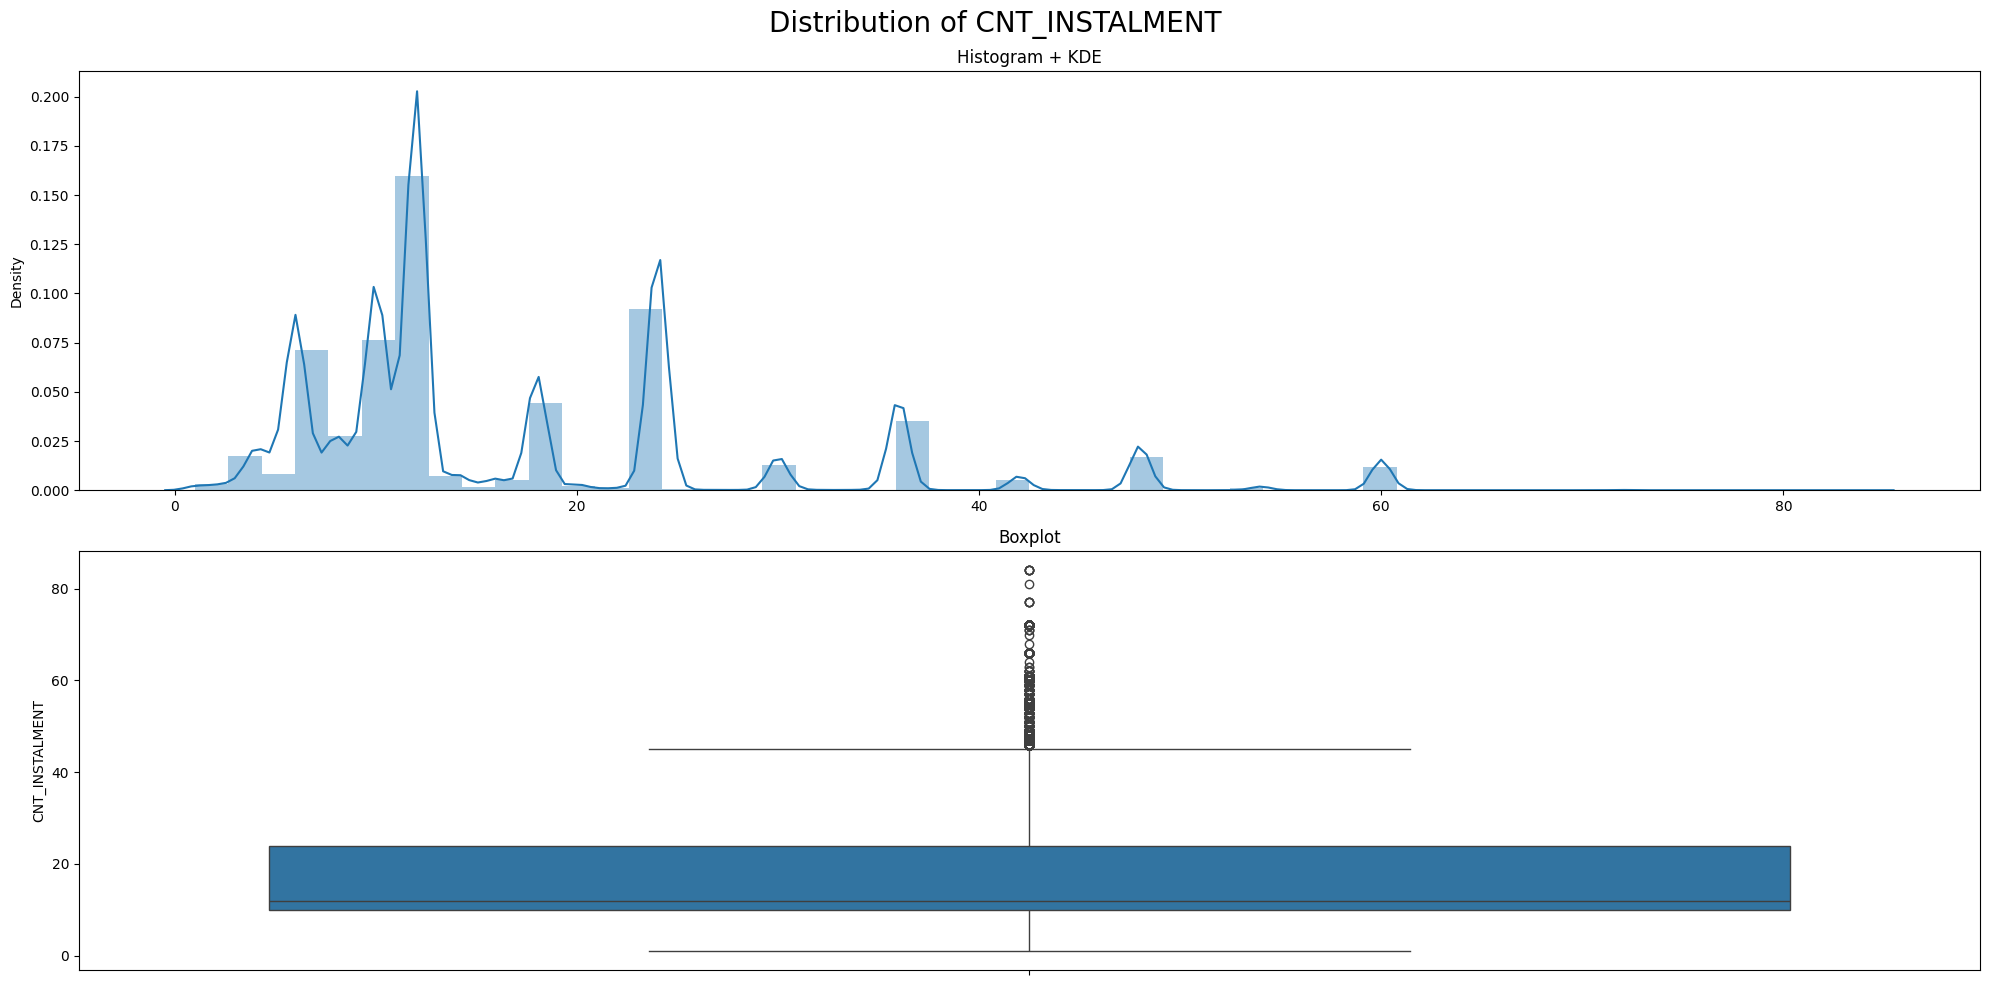

In [27]:
draw_distribution(POS_CASH_balance['CNT_INSTALMENT'],'Distribution of CNT_INSTALMENT')

#### - Distribution of CNT_INSTALMENT_FUTURE

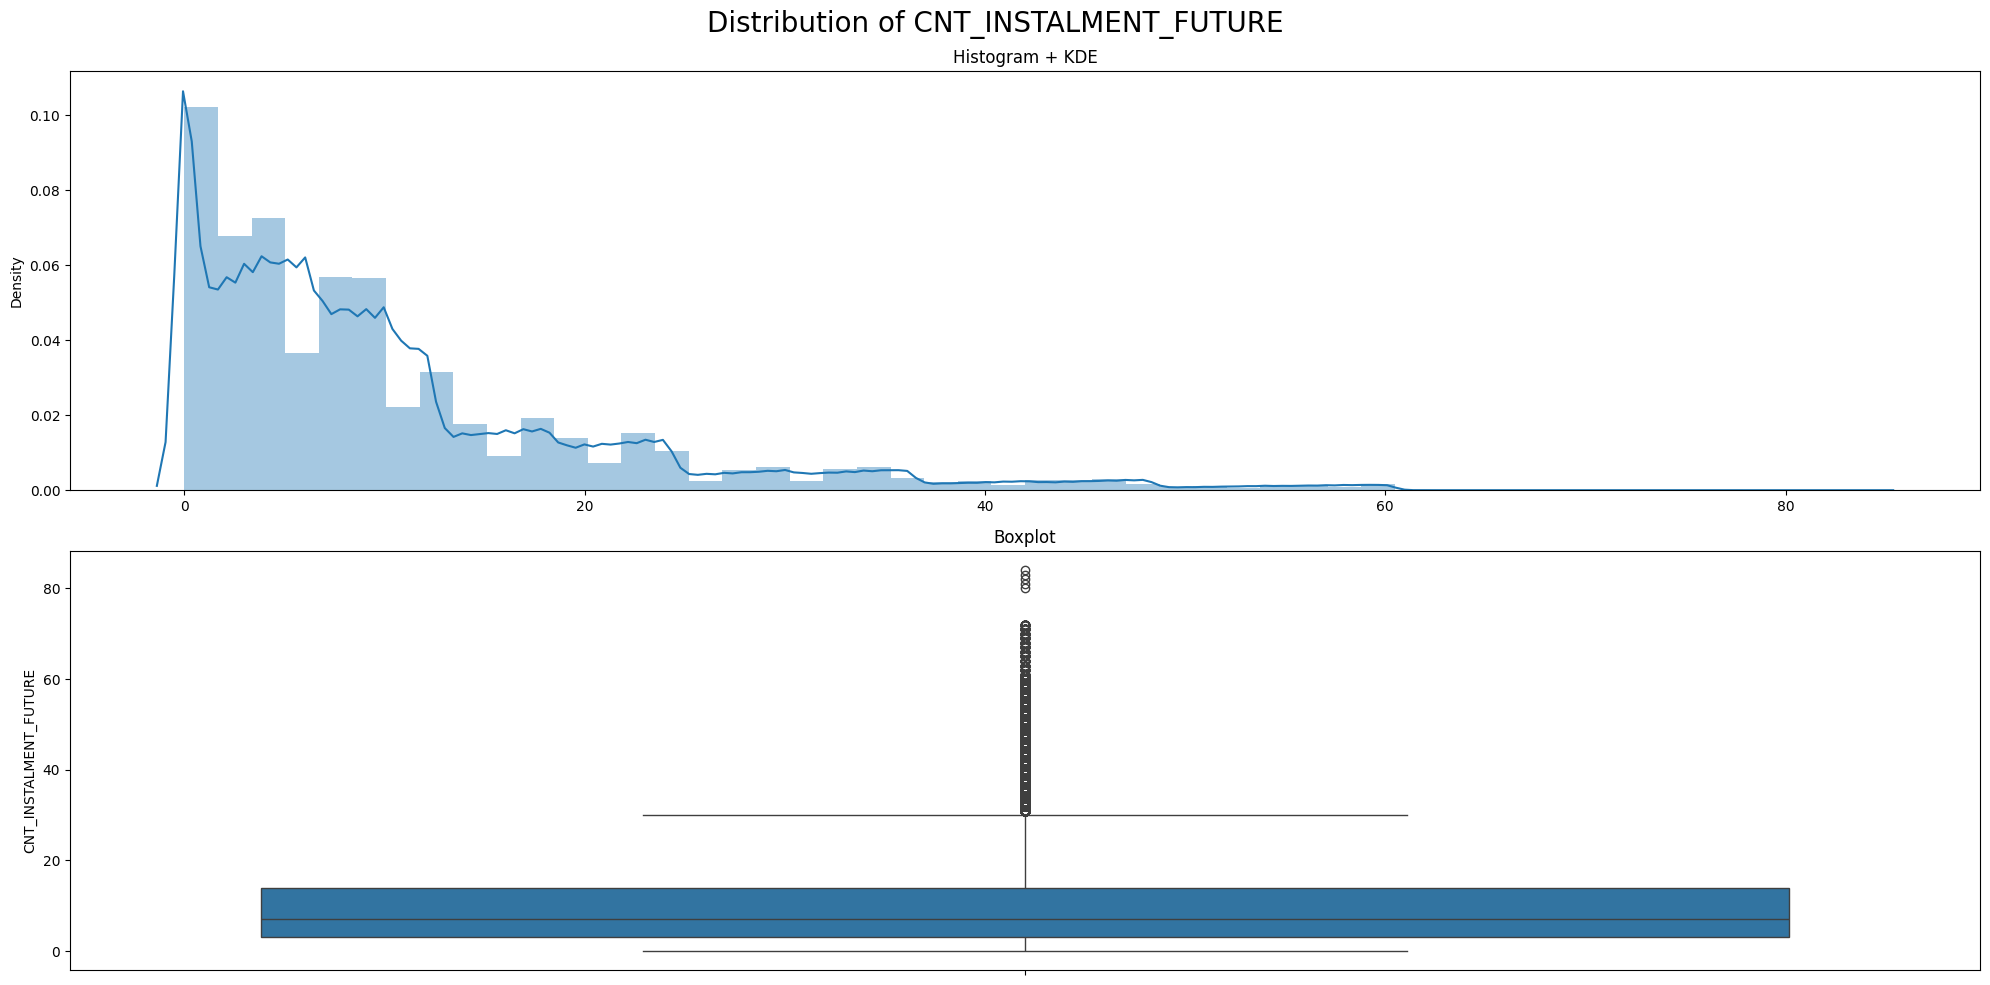

In [28]:
draw_distribution(POS_CASH_balance['CNT_INSTALMENT_FUTURE'],'Distribution of CNT_INSTALMENT_FUTURE')

#### - Distribution of SK_DPD

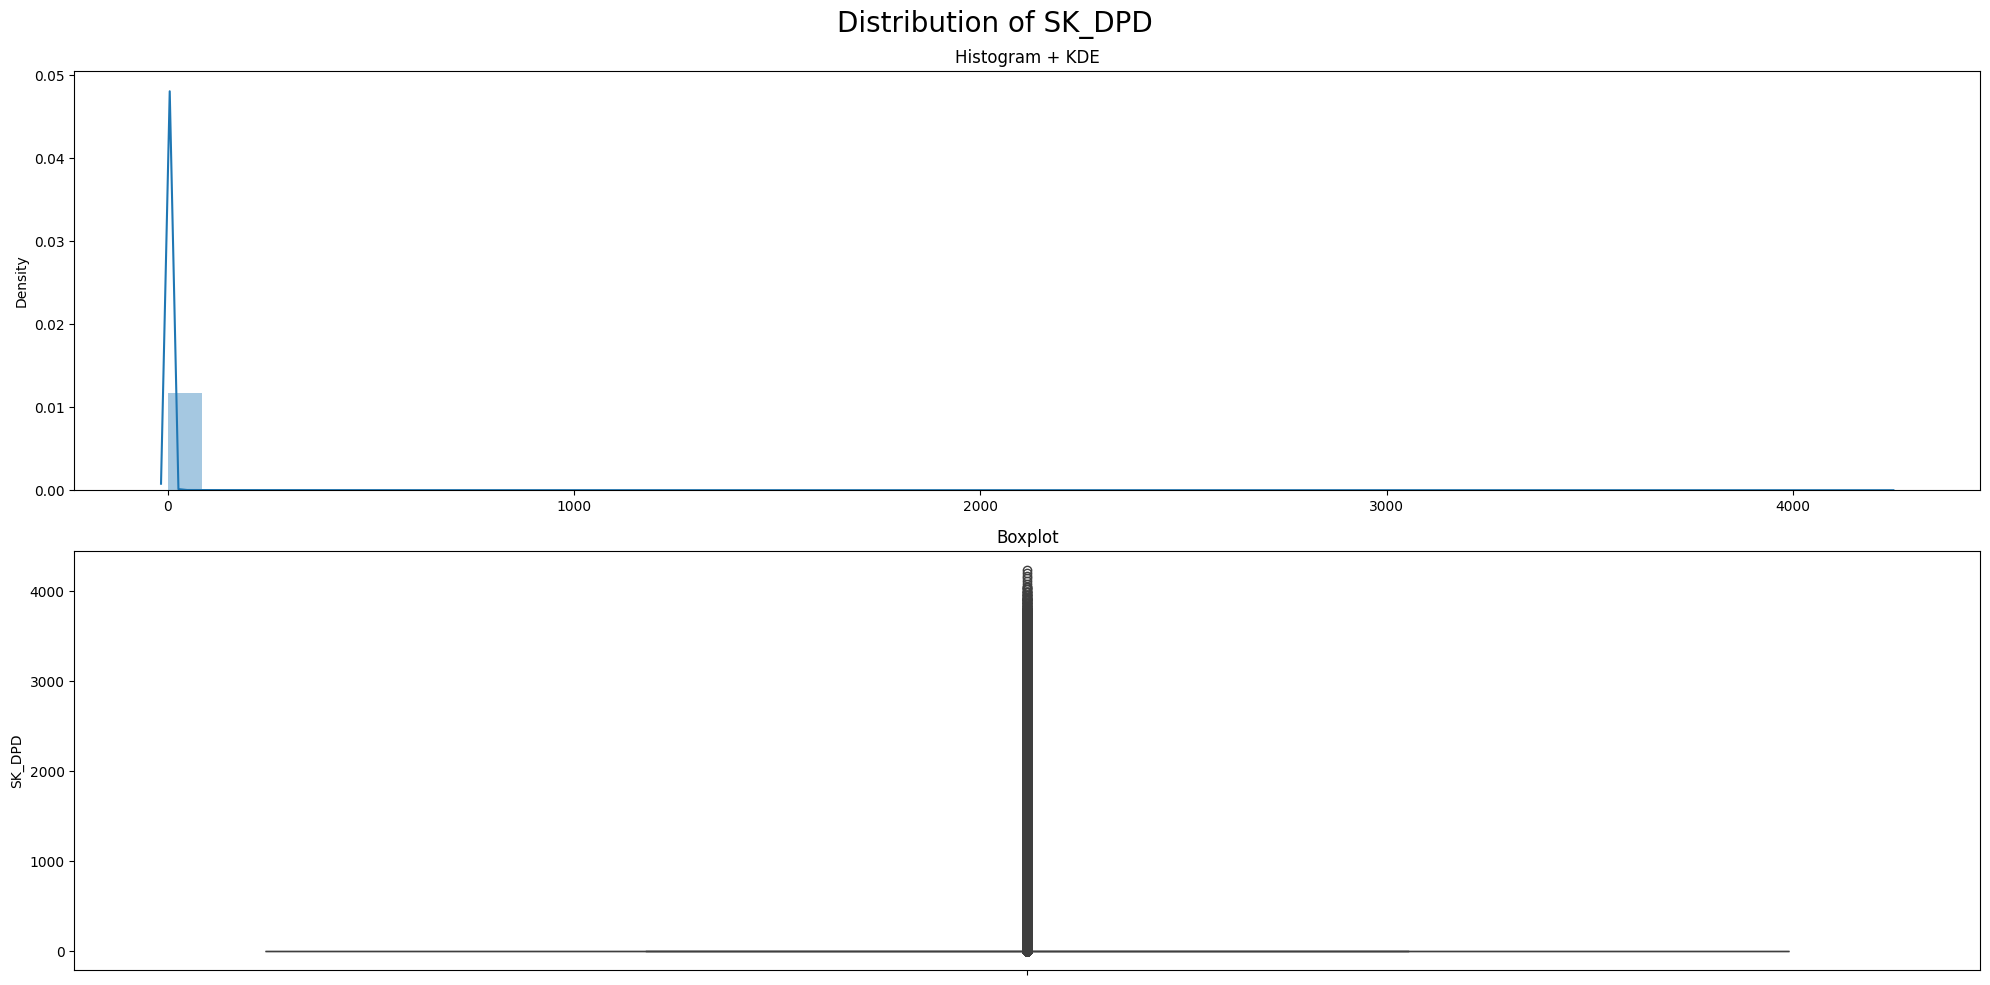

In [29]:
draw_distribution(POS_CASH_balance['SK_DPD'],'Distribution of SK_DPD')

#### - Distribution of SK_DPD_DEF

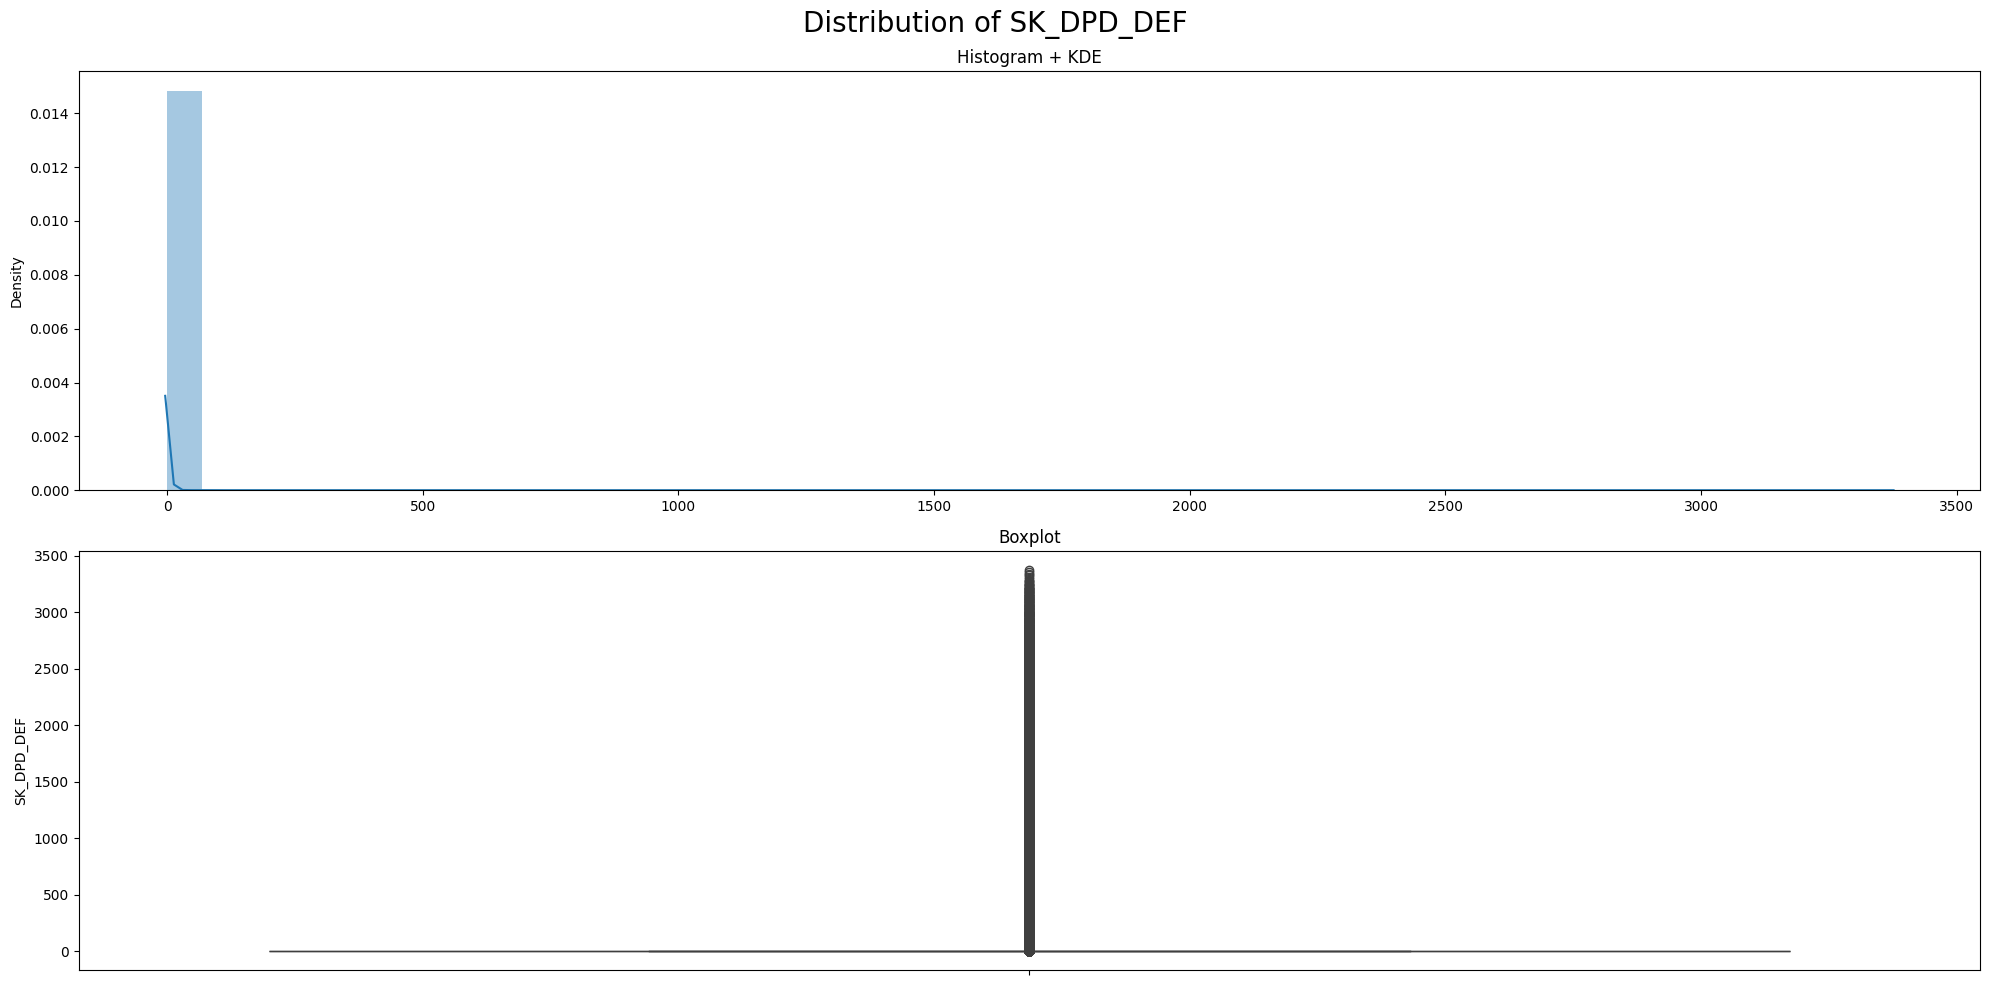

In [30]:
draw_distribution(POS_CASH_balance['SK_DPD_DEF'],'Distribution of SK_DPD_DEF')

In [31]:
POS_CASH_balance["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

NAME_CONTRACT_STATUS
Active                   91.516257
Completed                 7.431162
Signed                    0.873484
Demand                    0.071517
Returned to the store     0.053738
Approved                  0.049407
Amortized debt            0.004272
Canceled                  0.000140
XNA                       0.000023
Name: proportion, dtype: float64

In [32]:
POS_CASH_balance_filter = POS_CASH_balance.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
POS_CASH_balance_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,1231213,-1,12.0,12.0,Active,0,0
1,0,1716062,-5,2.0,0.0,Completed,0,0
2,0,1891354,-1,3.0,0.0,Completed,0,0
3,0,2665996,-10,5.0,0.0,Completed,0,0
4,1,1847729,-43,10.0,0.0,Completed,0,0
...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0
800333,307508,1978855,-64,12.0,1.0,Active,0,0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0


In [33]:
POS_CASH_balance[(POS_CASH_balance["SK_ID_CURR"] == 307508) & (POS_CASH_balance["SK_ID_PREV"] == 1956312)]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
5020191,1956312,307508,-5,10.0,6.0,Active,0,0
5020194,1956312,307508,-4,10.0,5.0,Active,0,0
5020196,1956312,307508,-8,10.0,9.0,Active,0,0
5020203,1956312,307508,-3,10.0,4.0,Active,0,0
5020204,1956312,307508,-2,10.0,3.0,Active,0,0
5020205,1956312,307508,-9,10.0,10.0,Active,0,0
5020207,1956312,307508,-6,10.0,7.0,Active,0,0
5020214,1956312,307508,-1,10.0,2.0,Active,0,0
5020215,1956312,307508,-7,10.0,8.0,Active,0,0


### 5.6. COUNT NUMBER OF INSTALLMENT

###  - Count the number of completed installments

In [34]:
POS_CASH_balance_filter["Completed_Flag"] = POS_CASH_balance_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
POS_CASH_balance_filter["Completed_Count"] = POS_CASH_balance_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
POS_CASH_balance_filter.drop(["Completed_Flag"], axis=1, inplace= True)
POS_CASH_balance_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,0,1231213,-1,12.0,12.0,Active,0,0,3
1,0,1716062,-5,2.0,0.0,Completed,0,0,3
2,0,1891354,-1,3.0,0.0,Completed,0,0,3
3,0,2665996,-10,5.0,0.0,Completed,0,0,3
4,1,1847729,-43,10.0,0.0,Completed,0,0,2
...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,2
800333,307508,1978855,-64,12.0,1.0,Active,0,0,2
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,2
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,2


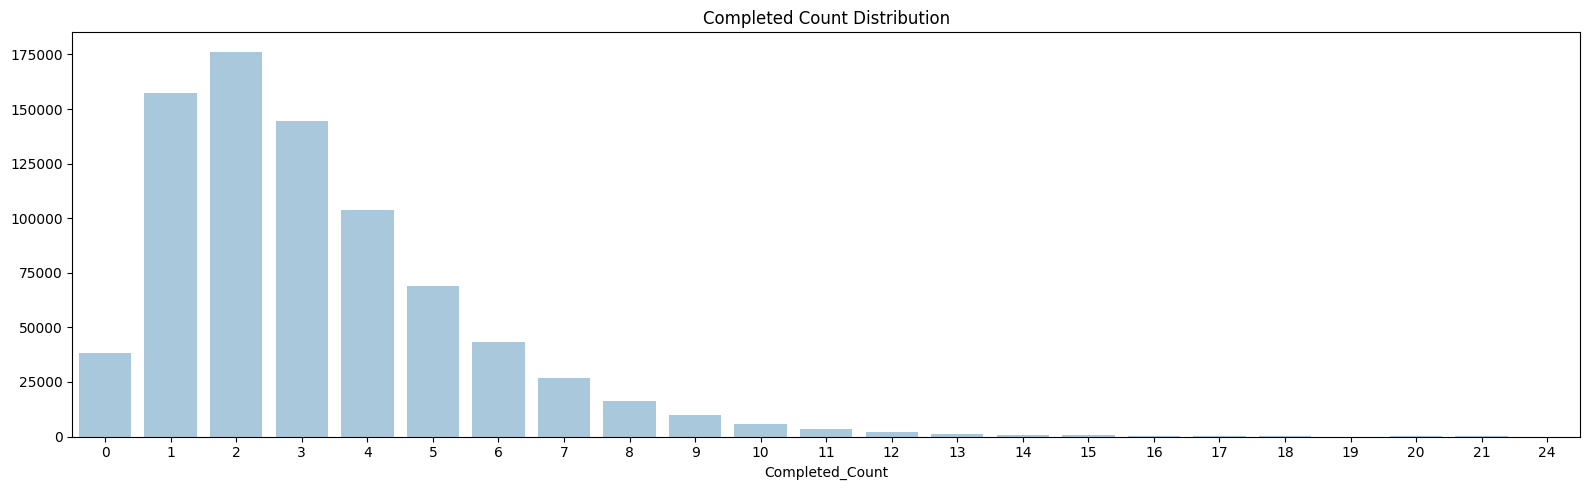

In [35]:
completed_count_SK = POS_CASH_balance_filter.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.set_palette("Blues_d", len(completed_count_SK))
sns.barplot(x=  completed_count_SK.index , y= completed_count_SK.values)
plt.title("Completed Count Distribution")
plt.tight_layout()
plt.show()

### - Count the number of overdue installments by ID

In [36]:
def overdue_flag(x):
    if x['SK_DPD_DEF'] > 0 and x['CNT_INSTALMENT_FUTURE'] > 0:
        return 1
    else:
        return 0

POS_CASH_balance_filter["Overdue_flag"] = POS_CASH_balance_filter.apply(overdue_flag, axis= 1)
POS_CASH_balance_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_flag
0,0,1231213,-1,12.0,12.0,Active,0,0,3,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,3,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,3,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,2,0
800333,307508,1978855,-64,12.0,1.0,Active,0,0,2,0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,2,0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,2,0


In [37]:
POS_CASH_balance_filter["Overdue_Count"] = POS_CASH_balance_filter.groupby(["SK_ID_CURR"])["Overdue_flag"].transform("sum")
POS_CASH_balance_filter.drop(["Overdue_flag"], axis= 1, inplace= True)
POS_CASH_balance_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count,Overdue_Count
0,0,1231213,-1,12.0,12.0,Active,0,0,3,0
1,0,1716062,-5,2.0,0.0,Completed,0,0,3,0
2,0,1891354,-1,3.0,0.0,Completed,0,0,3,0
3,0,2665996,-10,5.0,0.0,Completed,0,0,3,0
4,1,1847729,-43,10.0,0.0,Completed,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
800332,307508,1956312,-1,10.0,2.0,Active,0,0,2,0
800333,307508,1978855,-64,12.0,1.0,Active,0,0,2,0
800334,307509,1153961,-43,8.0,0.0,Completed,0,0,2,0
800335,307509,2384616,-25,6.0,0.0,Completed,0,0,2,0


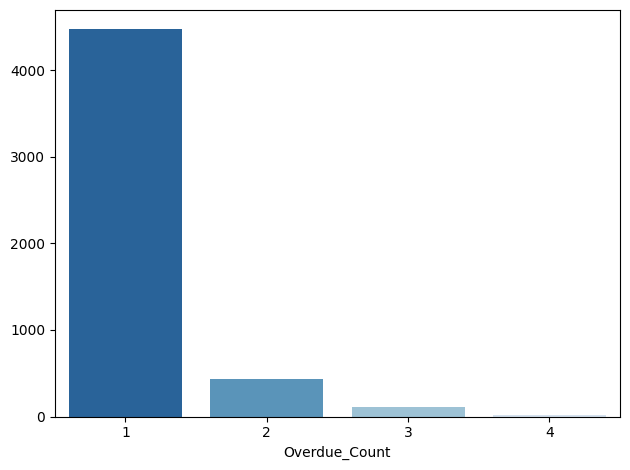

In [38]:
overdue_count_SK = POS_CASH_balance_filter.groupby(["Overdue_Count"]).size()[1:]
sns.barplot(x= overdue_count_SK.index , y= overdue_count_SK.values, palette="Blues_r")

plt.tight_layout()
plt.show()

In [39]:
pf_final = POS_CASH_balance_filter.groupby('SK_ID_CURR').first()[["Completed_Count","Overdue_Count"]]
pf_final

,Completed_Count,Overdue_Count
SK_ID_CURR,,
0,3,0
1,2,0
2,3,0
3,3,0
4,0,0
...,...,...
307505,2,0
307506,4,0
307508,2,0


# *6.OBSERVATION AND CONCLUSION*

Imbalance Ratios:\
'CNT_INSTALMENT_FUTURE' has a moderate imbalance ratio of 0.4315.
Other columns, such as 'NAME_CONTRACT_STATUS,' 'SK_DPD,' and 'SK_DPD_DEF,' have low imbalance ratios (0.0000 to 0.0023).

Outliers:\
No specific outlier information is provided for columns such as 'MONTHS_BALANCE,' 'CNT_INSTALMENT,' and 'CNT_INSTALMENT_FUTURE.'
Columns 'SK_DPD' and 'SK_DPD_DEF' may have outliers, with values like 384, 354, and 505. Further analysis is needed to confirm and handle outliers.

Category columns:\
The 'NAME_CONTRACT_STATUS' feature has nine unique values, suggesting it is a categorical variable.
There are no missing values (NaN) in the 'NAME_CONTRACT_STATUS' column.
